In [ ]:
!pip install pycaret

     |████████████████████████████████| 256kB 2.7MB/s 
     |████████████████████████████████| 276kB 8.2MB/s 
     |████████████████████████████████| 13.9MB 233kB/s 
     |████████████████████████████████| 266kB 39.0MB/s 
     |████████████████████████████████| 1.8MB 37.3MB/s 
     |████████████████████████████████| 174kB 41.7MB/s 
     |████████████████████████████████| 66.2MB 43kB/s 
     |████████████████████████████████| 1.6MB 37.8MB/s 
     |████████████████████████████████| 102kB 11.8MB/s 
     |████████████████████████████████| 6.8MB 32.7MB/s 
     |████████████████████████████████| 1.1MB 43.0MB/s 
     |████████████████████████████████| 327kB 37.6MB/s 
     |████████████████████████████████| 6.0MB 28.7MB/s 
     |████████████████████████████████| 81kB 9.7MB/s 
     |████████████████████████████████| 153kB 39.1MB/s 
     |████████████████████████████████| 163kB 44.6MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 3.1MB 31.9MB/s 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:

Well_1=pd.read_csv('/content/drive/My Drive/FORCE_Facies/LAS logs/C4/CSV/Well15913.csv')
Well_2=pd.read_csv('/content/drive/My Drive/FORCE_Facies/LAS logs/C4/CSV/Well15915.csv')
Well_3=pd.read_csv('/content/drive/My Drive/FORCE_Facies/LAS logs/C4/CSV/Well15917.csv')
Well_4=pd.read_csv('/content/drive/My Drive/FORCE_Facies/LAS logs/C4/CSV/Well16101.csv')
Well_5=pd.read_csv('/content/drive/My Drive/FORCE_Facies/LAS logs/C4/CSV/Well16102.csv')
Well_6=pd.read_csv('/content/drive/My Drive/FORCE_Facies/LAS logs/C4/CSV/Well16103.csv')
Well_7=pd.read_csv('/content/drive/My Drive/FORCE_Facies/LAS logs/C4/CSV/Well16105.csv')
Well_8=pd.read_csv('/content/drive/My Drive/FORCE_Facies/LAS logs/C4/CSV/Well161111st3.csv')
Well_9=pd.read_csv('/content/drive/My Drive/FORCE_Facies/LAS logs/C4/CSV/Well1641.csv')
Well_10=pd.read_csv('/content/drive/My Drive/FORCE_Facies/LAS logs/C4/CSV/Well1674.csv')
Well_11=pd.read_csv('/content/drive/My Drive/FORCE_Facies/LAS logs/C4/CSV/Well1675.csv')
Well_12=pd.read_csv('/content/drive/My Drive/FORCE_Facies/LAS logs/C4/CSV/Well1681.csv')
Well_13=pd.read_csv('/content/drive/My Drive/FORCE_Facies/LAS logs/C4/CSV/Well17111.csv')
Well_14=pd.read_csv('/content/drive/My Drive/FORCE_Facies/LAS logs/C4/CSV/Well712S.csv')


In [ ]:
training_data=pd.concat([Well_1,Well_2,Well_3,Well_4,Well_5,Well_6,Well_7,Well_8,
                         Well_9,Well_10,Well_11,Well_12,Well_13,Well_14])

In [ ]:
Well_1=pd.read_csv('/content/Facies_C4.csv')
Well_2=pd.read_csv('/content/Facies_C3.csv')
Well_3=pd.read_csv('/content/Facies_C1.csv')
Well_4=pd.read_csv('/content/Facies_C2.csv')

In [ ]:
training_data=pd.concat([Well_1,Well_2,Well_3,Well_4])

In [ ]:
training_data.to_csv('Final_Sub_1.csv')

In [ ]:
training_data=pd.read_csv('/content/drive/My Drive/FORCE_Facies/Notebooks/C1_training.csv')

In [ ]:
training_data.describe()

,Unnamed: 0,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
count,255286.000000,255286.000000,255270.000000,2.552700e+05,255270.000000,242241.000000,132169.000000,248377.000000,255119.000000,226964.000000,255286.000000,10406.000000,173520.000000,152748.000000,250063.000000,203257.000000,101037.000000,35315.000000,40016.000000,2150.000000,223292.000000,0.0,8376.000000,76646.000000,76066.000000,255286.000000,255241.000000
mean,829685.482952,2579.405019,460385.935818,6.804806e+06,-2521.406357,13.142262,13.461266,5.559493,3.779059,2.325605,71.731346,87.063002,0.329840,7.620086,112.626360,40.732738,10.428288,24.258938,197.094269,0.222832,-0.007979,NaN,38.531122,18.982744,-232.380294,62189.422961,1.093496
std,77734.436179,1092.312331,14916.366194,2.492710e+04,1060.665352,3.783977,129.968954,69.436376,29.003633,0.241233,27.129239,32.017567,0.107320,9.338204,26.920552,69.385794,2.588205,15.735260,35.876968,0.398452,0.100028,NaN,258.244550,14.248091,438.328063,11436.191426,0.348552
min,697861.000000,291.104000,426898.781250,6.771048e+06,-5395.563477,2.344000,0.121100,0.130100,0.318227,1.099369,7.328732,-777.985962,-0.000180,0.100000,38.234398,-999.000000,6.000000,0.276299,93.631721,-0.698280,-6.043000,NaN,0.195000,0.012312,-999.000000,30000.000000,1.000000
25%,761682.250000,1700.511250,448303.437500,6.783936e+06,-3289.229798,9.847943,1.022926,1.072505,1.086574,2.167997,52.422893,74.593876,0.266217,3.940682,92.556831,17.575537,8.500000,12.955328,172.454449,-0.031608,-0.014848,NaN,1.937297,7.773039,0.289081,65000.000000,1.000000
50%,825503.500000,2556.424718,463377.750000,6.803718e+06,-2526.004029,12.441905,1.556970,1.589322,1.565300,2.376111,72.089409,88.176479,0.330146,5.205435,107.214478,44.435486,8.500000,22.453413,197.898140,0.134649,-0.003306,NaN,2.600773,16.622156,1.129151,65000.000000,1.000000
75%,898674.750000,3412.738103,473394.250000,6.814189e+06,-1674.930206,16.900000,2.565050,2.400306,2.510199,2.500398,87.923822,100.063076,0.397088,7.729974,132.811005,64.327698,12.250001,33.275801,218.771172,0.337875,0.009137,NaN,3.679824,28.190001,1.861954,65030.000000,1.000000
max,962496.000000,5436.632000,488188.906250,6.853056e+06,-269.101532,26.755939,2000.000000,1950.000000,1795.834595,3.457820,531.937866,963.608582,0.893795,371.808319,320.478882,221.335983,17.500000,438.881439,331.669434,3.733377,0.940520,NaN,2000.000000,518.829773,2000.000000,99000.000000,3.000000


In [ ]:
training_data.isna().any()

Unnamed: 0                           False
WELL                                 False
DEPTH_MD                             False
X_LOC                                 True
Y_LOC                                 True
Z_LOC                                 True
GROUP                                False
FORMATION                             True
CALI                                  True
RSHA                                  True
RMED                                  True
RDEP                                  True
RHOB                                  True
GR                                   False
SGR                                   True
NPHI                                  True
PEF                                   True
DTC                                   True
SP                                    True
BS                                    True
ROP                                   True
DTS                                   True
DCAL                                  True
DRHO       

In [ ]:
import numpy as np
K=np.log10(training_data['RDEP'])
training_data['Log_RDEP']=K

In [ ]:
training_data.describe()

,Unnamed: 0,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE,Log_RDEP
count,255286.000000,255286.000000,255270.000000,2.552700e+05,255270.000000,242241.000000,132169.000000,248377.000000,255119.000000,226964.000000,255286.000000,10406.000000,173520.000000,152748.000000,250063.000000,203257.000000,101037.000000,35315.000000,40016.000000,2150.000000,223292.000000,0.0,8376.000000,76646.000000,76066.000000,255286.000000,255241.000000,255119.000000
mean,829685.482952,2579.405019,460385.935818,6.804806e+06,-2521.406357,13.142262,13.461266,5.559493,3.779059,2.325605,71.731346,87.063002,0.329840,7.620086,112.626360,40.732738,10.428288,24.258938,197.094269,0.222832,-0.007979,NaN,38.531122,18.982744,-232.380294,62189.422961,1.093496,0.258928
std,77734.436179,1092.312331,14916.366194,2.492710e+04,1060.665352,3.783977,129.968954,69.436376,29.003633,0.241233,27.129239,32.017567,0.107320,9.338204,26.920552,69.385794,2.588205,15.735260,35.876968,0.398452,0.100028,NaN,258.244550,14.248091,438.328063,11436.191426,0.348552,0.358412
min,697861.000000,291.104000,426898.781250,6.771048e+06,-5395.563477,2.344000,0.121100,0.130100,0.318227,1.099369,7.328732,-777.985962,-0.000180,0.100000,38.234398,-999.000000,6.000000,0.276299,93.631721,-0.698280,-6.043000,NaN,0.195000,0.012312,-999.000000,30000.000000,1.000000,-0.497263
25%,761682.250000,1700.511250,448303.437500,6.783936e+06,-3289.229798,9.847943,1.022926,1.072505,1.086574,2.167997,52.422893,74.593876,0.266217,3.940682,92.556831,17.575537,8.500000,12.955328,172.454449,-0.031608,-0.014848,NaN,1.937297,7.773039,0.289081,65000.000000,1.000000,0.036059
50%,825503.500000,2556.424718,463377.750000,6.803718e+06,-2526.004029,12.441905,1.556970,1.589322,1.565300,2.376111,72.089409,88.176479,0.330146,5.205435,107.214478,44.435486,8.500000,22.453413,197.898140,0.134649,-0.003306,NaN,2.600773,16.622156,1.129151,65000.000000,1.000000,0.194598
75%,898674.750000,3412.738103,473394.250000,6.814189e+06,-1674.930206,16.900000,2.565050,2.400306,2.510199,2.500398,87.923822,100.063076,0.397088,7.729974,132.811005,64.327698,12.250001,33.275801,218.771172,0.337875,0.009137,NaN,3.679824,28.190001,1.861954,65030.000000,1.000000,0.399708
max,962496.000000,5436.632000,488188.906250,6.853056e+06,-269.101532,26.755939,2000.000000,1950.000000,1795.834595,3.457820,531.937866,963.608582,0.893795,371.808319,320.478882,221.335983,17.500000,438.881439,331.669434,3.733377,0.940520,NaN,2000.000000,518.829773,2000.000000,99000.000000,3.000000,3.254266


In [ ]:
data=training_data[['GR','Log_RDEP']]

In [ ]:
from pycaret.regression import *
model = setup(data, target = 'Log_RDEP', train_size = 0.7)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,8280
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(255286, 2)"
4,Missing Values,True
5,Numeric Features,1
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extreme Gradient Boosting,0.2493,0.1278,0.3573,0.0325,0.2046,-0.1451,0.4316
1,Gradient Boosting Regressor,0.2494,0.1281,0.3578,0.0302,0.2049,-0.1416,0.9161
2,Light Gradient Boosting Machine,0.2508,0.1285,0.3584,0.0266,0.2063,-0.1355,0.1158
3,CatBoost Regressor,0.2511,0.1287,0.3586,0.0257,0.2063,-0.2142,3.1279
4,Orthogonal Matching Pursuit,0.2552,0.1303,0.3608,0.0136,0.2052,-0.1369,0.0042
5,Least Angle Regression,0.2552,0.1303,0.3608,0.0136,0.2052,-0.1369,0.0050
6,Bayesian Ridge,0.2552,0.1303,0.3608,0.0136,0.2052,-0.1372,0.0063
7,Ridge Regression,0.2552,0.1303,0.3608,0.0136,0.2052,-0.1369,0.0051
8,Linear Regression,0.2552,0.1303,0.3608,0.0136,0.2052,-0.1369,0.0055
9,Elastic Net,0.2568,0.1306,0.3613,0.0110,0.2045,-0.1891,0.0073


In [ ]:
xgboost= create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2486,0.1326,0.3641,0.0177,0.2083,0.0699
1,0.2519,0.1265,0.3557,0.0315,0.2029,5.9227
2,0.2548,0.1320,0.3633,0.0284,0.2097,-0.1907
3,0.2436,0.1215,0.3486,0.0347,0.2004,0.1468
4,0.2462,0.1202,0.3468,0.0273,0.1980,0.1350
5,0.2490,0.1283,0.3582,0.0405,0.2051,0.2328
6,0.2585,0.1429,0.3781,0.0267,0.2151,-4.5483
7,0.2484,0.1282,0.3581,0.0399,0.2042,-3.0160
8,0.2445,0.1187,0.3445,0.0387,0.1983,-0.5730
9,0.2473,0.1266,0.3559,0.0400,0.2039,0.3698


In [ ]:
xgboost= tune_model(xgboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2479,0.1317,0.3629,0.0243,0.2072,0.0740
1,0.2510,0.1256,0.3544,0.0385,0.2020,6.0407
2,0.2535,0.1309,0.3618,0.0365,0.2086,-0.1416
3,0.2426,0.1204,0.3469,0.0438,0.1992,0.1281
4,0.2458,0.1201,0.3465,0.0286,0.1976,0.1103
5,0.2486,0.1282,0.3580,0.0418,0.2051,0.1483
6,0.2582,0.1425,0.3775,0.0295,0.2147,-4.5225
7,0.2484,0.1281,0.3579,0.0408,0.2041,-3.1759
8,0.2444,0.1185,0.3442,0.0400,0.1976,-0.5889
9,0.2468,0.1263,0.3554,0.0424,0.2036,0.4100


In [ ]:
K=plot_model(xgboost, plot='parameter')

,Parameters
base_score,0.5
booster,gbtree
colsample_bylevel,1
colsample_bynode,1
colsample_bytree,0.5
gamma,0
importance_type,gain
learning_rate,0.2
max_delta_step,0
max_depth,1


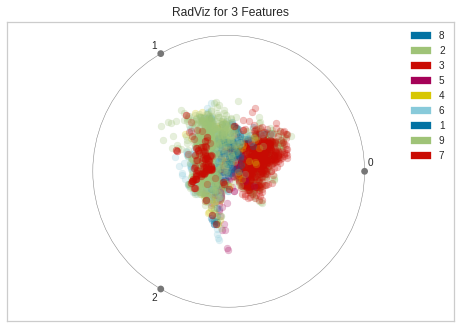

In [ ]:
plot_model(tuned_xgboost,'dimension')

In [ ]:
#pred_holdouts = predict_model(et)
#pred_holdouts.head()

In [ ]:
import pandas as pd
validation_data = pd.read_csv('validation_data_nofacies.csv')
new_data=validation_data.drop(['Well Name','Formation'], axis=1)

In [ ]:
new_data.head()

,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,2808.0,66.276,0.630,3.3,10.65,3.591,1,1.000
1,2808.5,77.252,0.585,6.5,11.95,3.341,1,0.978
2,2809.0,82.899,0.566,9.4,13.60,3.064,1,0.956
3,2809.5,80.671,0.593,9.5,13.25,2.977,1,0.933
4,2810.0,75.971,0.638,8.7,12.35,3.020,1,0.911


In [ ]:
predict_new = predict_model(tuned_et, data=new_data)
predict_new.head(15)

,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Label
0,2808.0,66.276,0.630,3.3,10.65,3.591,1,1.000,3
1,2808.5,77.252,0.585,6.5,11.95,3.341,1,0.978,3
2,2809.0,82.899,0.566,9.4,13.60,3.064,1,0.956,3
3,2809.5,80.671,0.593,9.5,13.25,2.977,1,0.933,3
4,2810.0,75.971,0.638,8.7,12.35,3.020,1,0.911,3
5,2810.5,73.955,0.667,6.9,12.25,3.086,1,0.889,3
6,2811.0,77.962,0.674,6.5,12.45,3.092,1,0.867,3
7,2811.5,83.894,0.667,6.3,12.65,3.123,1,0.844,3
8,2812.0,84.424,0.653,6.7,13.05,3.121,1,0.822,3
9,2812.5,83.160,0.642,7.3,12.95,3.127,1,0.800,3


In [ ]:
true = pd.read_csv('blind_stuart_crawford_core_facies.csv')

In [ ]:
predicted_labels=predict_new['Label']
y_test=true['LithCode']

In [ ]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, predicted_labels)
cm = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]

In [ ]:
import numpy as np
def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc
print ('Facies classification accuracy = %f' % accuracy(conf))

Facies classification accuracy = 0.538750


In [ ]:
feature_names = ['GR','ILD_log10','DeltaPHI','PE','PHIND','NM_M','RELPOS']
facies_names = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS', 'WS', 'D', 'PS', 'BS']

Text(0.5, 1.0, 'Confusion Matrix')

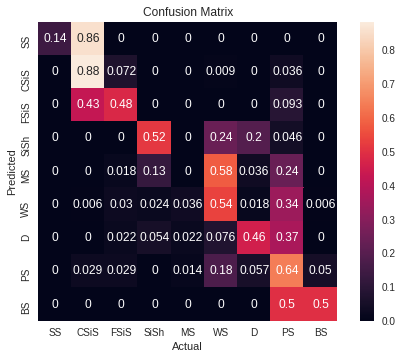

In [ ]:
import seaborn as sns
axes = sns.heatmap(cm,annot=True,square=True, cbar=True, xticklabels= facies_names, yticklabels= facies_names)
axes.set_xlabel('Actual')
axes.set_ylabel('Predicted')
axes.set_title('Confusion Matrix')